### 1. Data Exploration:
a. Load the dataset and perform exploratory data analysis (EDA).
b. Examine the features, their types, and summary statistics.
c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
Analyze any patterns or correlations observed in the data.

2. Data Preprocessing:

    a. Handle missing values (e.g., imputation).
b. Encode categorical variables.

3. Model Building:

    a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).
b. Train the model using the training data.

4. Model Evaluation:

    a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.
Visualize the ROC curve.

5. Interpretation:
a. Interpret the coefficients of the logistic regression model.
b. Discuss the significance of features in predicting the target variable (survival probability in this case).

6. Deployment with Streamlit:
In this task, you will deploy your logistic regression model using Streamlit. The deployment can be done locally or online via Streamlit Share. Your task includes creating a Streamlit app in Python that involves loading your trained model and setting up user inputs for predictions.


# LOGISTIC REGRESSION

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder



In [3]:
# Load the datasets
train_df = pd.read_csv(r"C:\Users\Dell\Downloads\Titanic_train.csv")
test_df = pd.read_csv(r"C:\Users\Dell\Downloads\Titanic_test.csv")

# Data Exploration
print("Training Data Info:")
print(train_df.info())
print("\nTraining Data Description:")
print(train_df.describe())



Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Training Data Description:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699

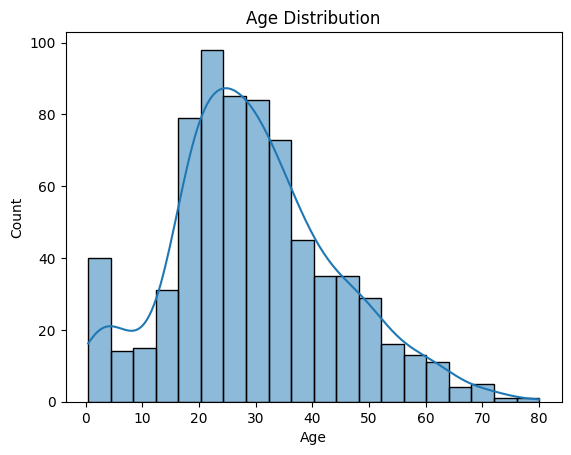

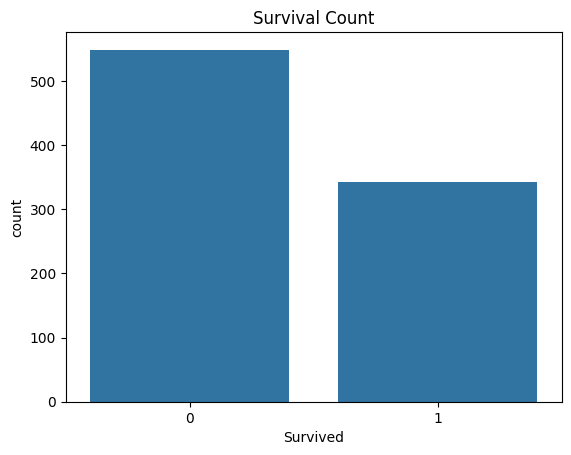

In [4]:
# Visualize the data
sns.histplot(data=train_df, x='Age', kde=True)
plt.title('Age Distribution')
plt.show()

sns.countplot(data=train_df, x='Survived')
plt.title('Survival Count')
plt.show()



In [5]:
# Data Preprocessing
# Handle missing values
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
train_df['Fare'].fillna(train_df['Fare'].median(), inplace=True)



In [6]:
# Encode categorical variables
label_enc = LabelEncoder()
train_df['Sex'] = label_enc.fit_transform(train_df['Sex'])
train_df['Embarked'] = label_enc.fit_transform(train_df['Embarked'])

# Select features and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = train_df[features]
y = train_df['Survived']


In [8]:

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)



In [9]:
# Model Building
model = LogisticRegression()
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_val)
y_pred_proba = model.predict_proba(X_val)[:, 1]

print(f"Accuracy: {accuracy_score(y_val, y_pred):.2f}")
print(f"Precision: {precision_score(y_val, y_pred):.2f}")
print(f"Recall: {recall_score(y_val, y_pred):.2f}")
print(f"F1 Score: {f1_score(y_val, y_pred):.2f}")
print(f"ROC AUC Score: {roc_auc_score(y_val, y_pred_proba):.2f}")



Accuracy: 0.80
Precision: 0.78
Recall: 0.73
F1 Score: 0.76
ROC AUC Score: 0.88


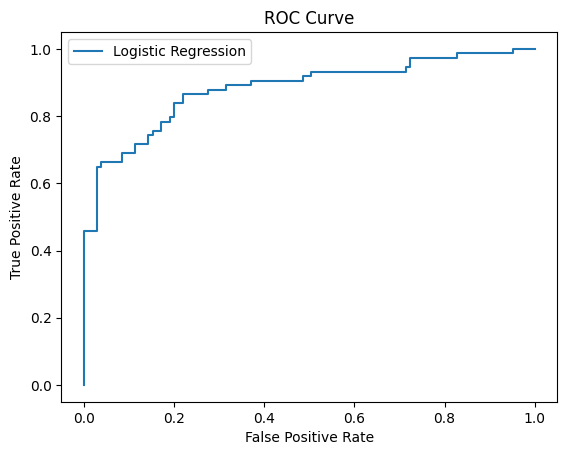

Coefficients of the logistic regression model:
    Feature  Coefficient
0    Pclass    -0.781927
1       Sex    -1.278705
2       Age    -0.395303
3     SibSp    -0.349105
4     Parch    -0.098565
5      Fare     0.126362
6  Embarked    -0.170937


In [10]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Interpretation
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_[0]})
print("Coefficients of the logistic regression model:")
print(coefficients)

## Interview Questions: